In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
import networkx as nx
from IPython.display import Image, HTML

import laUtilities as ut

%matplotlib inline

# Network Centrality and Clustering

Now we turn to two important concepts in the analysis of networks:
* Important __nodes__, and
* Important __groups of nodes.__

The question of important nodes leads to the notion of __centrality,__

And the question of important groups of nodes leads to the notion of __clustering.__

## Centrality

An common question in the analysis of networks is to understand the relative "importance" of the nodes in the network.

For example:

* in a social network, who are the most influential individuals?
* in the Web, which pages are more informative?
* in road network, which intersections are most heavily used?



The key idea is that the __structure__ of the network should give us some information about the relative importance of the nodes in the network.

To introduce concepts here, we'll look at a very famous dataset in the history of network analysis: Zachary's karate club.

The back story: from 1970 to 1972 the anthropologist Wayne Zachary studied the social relationships inside a university karate club.

While he was studying the club, a factional division led to a splitting of the club in two.   

The club became split between those who rallied around the club president, and those who rallied around the karate instructor.

```{note}
You can read the story of the Karate club [here](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf).  This dataset has become so famous that it has spawned [its own academic traditions](https://networkkarate.tumblr.com).
```

Here's a view of the social network of the karate club. 

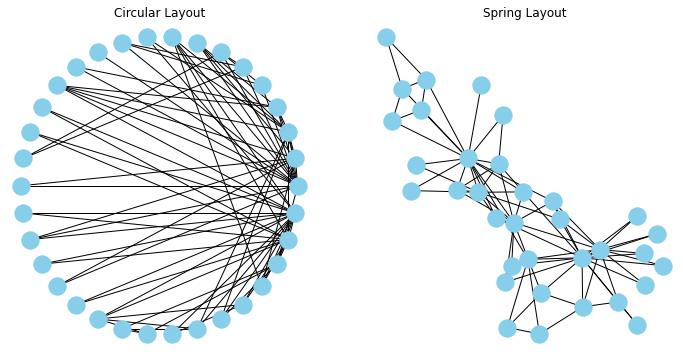

In [32]:
Gk = nx.karate_club_graph()
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 with_labels = False, node_color='skyblue')
plt.title('Circular Layout')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 with_labels = False, node_color='skyblue')
plt.title('Spring Layout')
plt.axis('off');

Do some nodes in the network have a special role?

Are some nodes more "important" than others?

These are often termed questions of __centrality__ (or __prestige__).

Today we'll study metrics for these notions.   We'll work with a graph $G$.

We will study three basic notions of centrality:
    
1. "Closeness" Centrality:  A central node is close to all others.
2. "Betweenness" Centrality: A central node is on many paths throught the network.
3. "Status" Centrality: A central node is connected to other central nodes.

### Closeness Centrality

The closeness centrality of a node $i$ is an indicator of the proximity between $i$ and all the other nodes in the graph.

We assume that $G$ is connected; let $d(i,j)$ be the shortest path distance between $i$ and $j$ in $G$.   

(Although other dissimilarity measures could be used.)

Then the standard way of formulating closeness centrality is the reciprocal of the total distance to all other nodes.

$$ \text{closeness}(i) = \frac{1}{\sum_{j \in V} d(i,j)}.$$



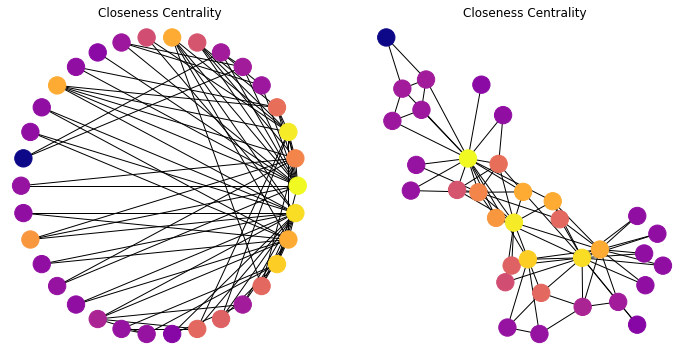

In [91]:
Gk = nx.karate_club_graph()
cent = list(nx.closeness_centrality(Gk).values())
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Closeness Centrality')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Closeness Centrality')
plt.axis('off');

In this graph, most nodes are close to most other nodes.   

However we can see that some nodes are slightly more central than others.

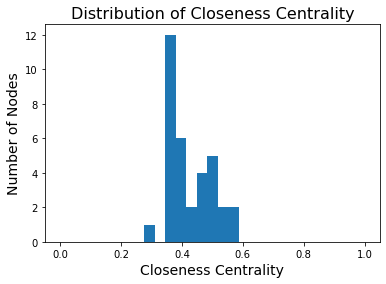

In [47]:
plt.figure(figsize = (6, 4))
plt.hist(cent, bins=np.linspace(0, 1, 30))
plt.xlabel('Closeness Centrality', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.title('Distribution of Closeness Centrality', size = 16);

### Betweenness Centrality

Another way to think about centrality is "is the node on many paths?"

If we picture the network as a conduit for information, then betweenness captures how important a node is to the communication process (or "how much" information passes through the node).

First, let's consider the case in which there is only one shortest path between any pair of nodes.

Then, the betweenness centrality of node $i$ is the __number of shortest paths that pass through $i$.__

Mathematically:

$$ \text{betweenness}(i) = \sum_{i \neq j \neq k \in V} \left\{\begin{array}{ll}1&\text{if path from }j\text{ to }k\text{ goes through }i\\0&\text{otherwise}\end{array}\right. $$

We can convert this to a value between 0 and 1 by dividing by ${n \choose 2} = N(N-1)/2$.

Now, in a general graph, there may be __multiple__ shortest paths between $j$ and $k$.  

To handle this, we define:
* $\sigma(i \mid j,k)$ is the number of shortest paths between $j$ and $k$ that pass through $i$, and 
* $\sigma(j,k)$ is the total number of shortest paths between $j$ and $k$.

Then we define the _dependency_ of $i$ on the paths between $j$ and $k$:

$$ \text{dependency}(i \mid j,k) = \frac{\sigma(i \mid j,k )}{\sigma(j,k)} $$

You can think of this as "the probability that a shortest path between $j$ and $k$ goes through $i$."

And finally:
    
$$ \text{betweenness}(i) = \sum_{i \neq j \neq k \in V} \text{dependency}(i \mid j, k) $$

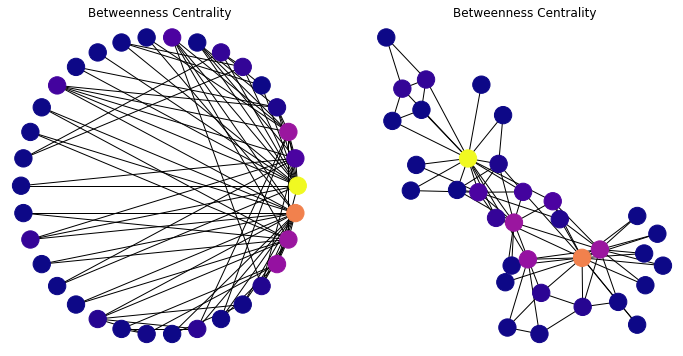

In [92]:
Gk = nx.karate_club_graph()
cent = list(nx.betweenness_centrality(Gk).values())
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Betweenness Centrality')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Betweenness Centrality')
plt.axis('off');

We start to see with this metric the "importance" of two or three key members of the karate club.

Note that many nodes will have a betweenness centrality of zero -- no shortest paths go through them.

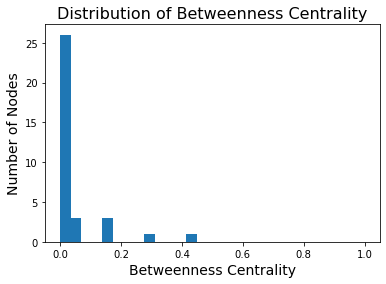

In [50]:
plt.figure(figsize = (6, 4))
plt.hist(cent, bins=np.linspace(0, 1, 30))
plt.xlabel('Betweenness Centrality', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.title('Distribution of Betweenness Centrality', size = 16);

### Adjacency Matrices

To define the next two centralities, we need to start thinking about graphs as __matrices.__

Given an $n$-node undirected graph $G = (V, E)$, its adjacency matrix $A$ is defined as:

$$ A_{ij} = \left\{ \begin{array}{ll}1 & \text{if }(i, j) \in E\\
                                    0 & \text{otherwise} \\
    \end{array}\right. $$

Here is what the adjacency matrix of the karate club graph looks like:


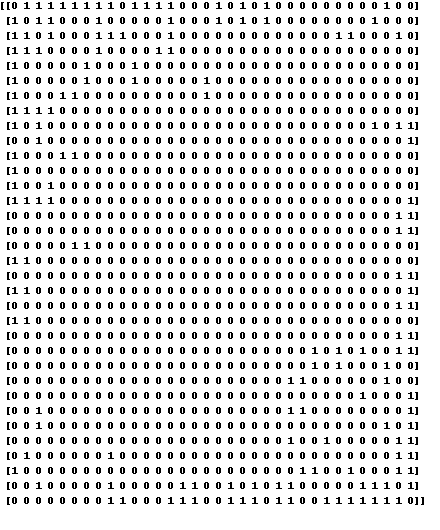

In [90]:
from PIL import Image, ImageFont, ImageDraw
from contextlib import contextmanager

@contextmanager
def show_complete_array():
    oldoptions = np.get_printoptions()
    np.set_printoptions(threshold = np.inf)
    np.set_printoptions(linewidth = 200)
    try:
        yield
    finally:
        np.set_printoptions(**oldoptions)
        
A = nx.adjacency_matrix(Gk).astype('int').todense()
with show_complete_array():
    img = Image.new('RGB', (440, 530), color = (255,255,255))
    #fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 30)
    ImageDraw.Draw(img).text((0,0), str(A), fill=(0,0,0))
img

An important way to think about adjacency matrices: __column $j$ holds $j$'s neighbors.__

### Status Centrality

The third notion of centrality is more subtle.   

In this context, one often talks of "prestige" rather than "centrality."  But the concepts are related.

The idea of status centrality is that __"high status" nodes are those that are connected to "high status" nodes.__

If you think this definition is circular, you are right!

Nonetheless, it leads to some metrics that are quite well defined and not hard to compute.

Let's make this definition more precise: __the centrality of a node is proportional to the sum of the centrality of its neighbors.__

Then we would say that:
    
$$ \mathbf{e}_i = 1/\lambda \sum_{(i, j) \in E} \mathbf{e}_j $$

This encodes our recursive definition for $\mathbf{e}_i$, based on a calculation that may or may not converge, depending on $\lambda.$

Now, we can write this equation in terms of the adjacency matrix $A$:
    
$$ \mathbf{e}_i = 1/\lambda \sum_j A_{ij} \mathbf{e}_j $$

Notice that the sum on the right is just a matrix-vector multiplication.   

So we can write even more concisely:
    
$$ A\mathbf{e} = \lambda\mathbf{e} $$

... which means that $\mathbf{e}$ must be an eigenvector of $A$.

For this reason, status centrality is often called __eigenvector centrality.__

Which eigenvector of $A$ should we choose?   

There is a good argument for chooseing the largest eigenvalue of $A$, in which case all of the entries in $\mathbf{e}$ will have the same sign.

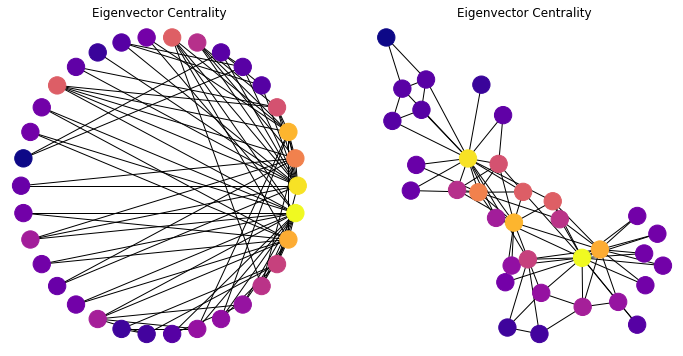

In [94]:
Gk = nx.karate_club_graph()
cent = list(nx.eigenvector_centrality(Gk).values())
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Eigenvector Centrality')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Eigenvector Centrality')
plt.axis('off');

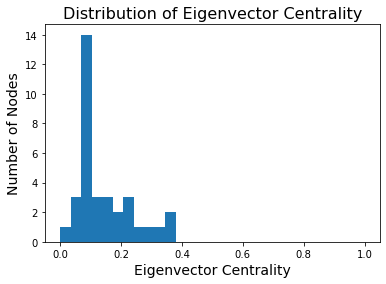

In [95]:
plt.figure(figsize = (6, 4))
plt.hist(cent, bins=np.linspace(0, 1, 30))
plt.xlabel('Eigenvector Centrality', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.title('Distribution of Eigenvector Centrality', size = 16);

In [97]:
with open('data/football.txt', 'r') as f:
   football =  nx.parse_edgelist(f, comments='#', nodetype=int, data=False)

In [98]:
print(f'The football network has {len(football.nodes())} nodes and {len(football.edges())} edges')

The football network has 115 nodes and 613 edges


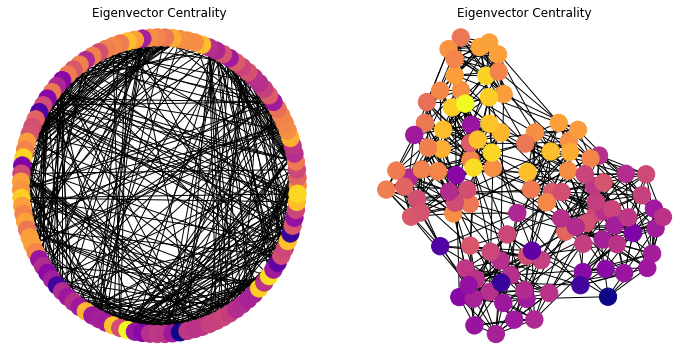

In [102]:
Gk = football
cent = list(nx.eigenvector_centrality(Gk).values())
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Eigenvector Centrality')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Eigenvector Centrality')
plt.axis('off');

To get a sense of what is unusual here, we can compare this network to a $G(n, p)$ random network with the same number of nodes and edges:

In [12]:
n = len(football.nodes())
e = len(football.edges())
p = e / ((n * (n-1))/2)
F_random = nx.erdos_renyi_graph(n, p, seed = 0)